<a href="https://colab.research.google.com/github/tamiti-ruet-ece/2-classes-SentiNob-/blob/main/2_classes_sentinob_bert_base_multilingual_cased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 40.8 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 41.8 MB/s 
     |████████████████████████████████| 6.6 MB 38.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
#pip install openpyxl

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_excel('/content/drive/MyDrive/thesis/3 classes/3_classes_Bert_Preprocessed__Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15728 entries, 0 to 15727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15728 non-null  int64 
 1   Data        15728 non-null  object
 2   Label       15728 non-null  int64 
 3   Token       15728 non-null  object
 4   Token_ID    15728 non-null  object
dtypes: int64(2), object(3)
memory usage: 614.5+ KB


In [6]:
pip install ktrain

     |████████████████████████████████| 25.3 MB 51.5 MB/s 
     |████████████████████████████████| 22.3 MB 4.3 MB/s 
     |████████████████████████████████| 981 kB 32.6 MB/s 
     |████████████████████████████████| 263 kB 9.6 MB/s 
     |████████████████████████████████| 2.8 MB 9.3 MB/s 
     |████████████████████████████████| 1.2 MB 31.0 MB/s 
     |████████████████████████████████| 468 kB 17.0 MB/s 
     |████████████████████████████████| 3.3 MB 36.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.30.0-py3-none-any.whl size=25309161 sha256=babcb17e5f13124ca5ab112bf5c75f164f666b741fcfc02fb8262e1e87d90fde
  Stored in directory: /root/.cache/pip/wheels/25/00/ae/80d1b19dd02bc2e6bc9bac32ba7dbaa59aad789e93274e4868
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=0973dfe5cf2c17fc40f5f2154fdab013edf5c0b2148e1f1d8ba1f5b2ac1a8c54
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b06f
  Created 

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [8]:
import ktrain
from ktrain import text

In [9]:
df_filtered = df[df['Label'] > 0]
df=df_filtered

In [10]:
df.Label.value_counts(), len(df)

(1    6410
 2    5709
 Name: Label, dtype: int64, 12119)

In [11]:
def Label(label):
    if(label==1):
        return 'positive'
    elif(label==2):
        return 'negative'
df['Sentiment'] = df['Label'].apply(Label)
df.Sentiment.value_counts(), len(df)

(positive    6410
 negative    5709
 Name: Sentiment, dtype: int64, 12119)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
encoded_labels = le.transform(df['Label'])
labels = np.array(encoded_labels) # Converting into numpy array
class_names =le.classes_
print(class_names)

In [12]:
df.Sentiment.value_counts(), len(df)

(positive    6410
 negative    5709
 Name: Sentiment, dtype: int64, 12119)

In [13]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Token'].tolist()
y_train=train['Sentiment'].tolist()
x_validation=validation['Token'].tolist()
y_validation=validation['Sentiment'].tolist()
x_test=test['Token'].tolist()
y_test=test['Sentiment'].tolist()

In [14]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [15]:
categories = ['positive','negative']

In [16]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [17]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:625: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


In [18]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

In [19]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [20]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(2)}

In [21]:
learner.fit_onecycle(2e-5,7,class_weight=weight) 



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/7
808/808 [==============================] - 330s 376ms/step - loss: 0.6097 - accuracy: 0.6610 - val_loss: 0.5133 - val_accuracy: 0.7591
Epoch 2/7
808/808 [==============================] - 296s 366ms/step - loss: 0.5002 - accuracy: 0.7585 - val_loss: 0.5179 - val_accuracy: 0.7492
Epoch 3/7
808/808 [==============================] - 296s 366ms/step - loss: 0.4363 - accuracy: 0.7966 - val_loss: 0.4756 - val_accuracy: 0.7690
Epoch 4/7
808/808 [==============================] - 296s 367ms/step - loss: 0.3730 - accuracy: 0.8414 - val_loss: 0.5112 - val_accuracy: 0.7797
Epoch 5/7
808/808 [==============================] - 296s 366ms/step - loss: 0.2850 - accuracy: 0.8767 - val_loss: 0.5072 - val_accuracy: 0.8127
Epoch 6/7
808/808 [==============================] - 295s 366ms/step - loss: 0.1795 - accuracy: 0.9290 - val_loss: 0.5375 - val_accuracy: 0.8168
Epoch 7/7
808/808 [==============================] - 296s 366ms/ste

In [22]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

    positive       0.80      0.81      0.81       578
    negative       0.83      0.82      0.82       634

    accuracy                           0.82      1212
   macro avg       0.81      0.82      0.81      1212
weighted avg       0.82      0.82      0.82      1212



array([[470, 108],
       [116, 518]])

In [23]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [24]:
y_pred = predictor.predict(x_test)
print(y_pred)

['negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'po

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.83      0.81       554
    positive       0.85      0.81      0.83       658

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212



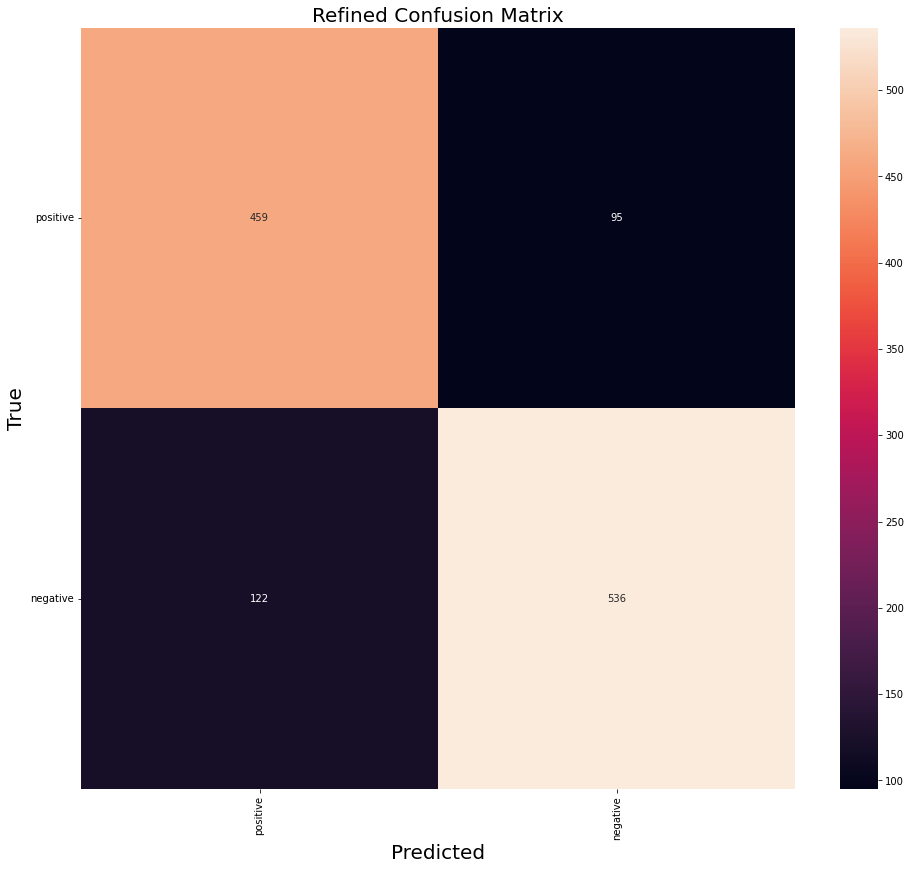

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)


cm = confusion_matrix(y_test, y_pred)

## Get Class Labels
labels = 2
#[0,1,2,3,4,5]_
class_names = categories 

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()
